# Acesso à Internet e à Televisão - Jorge2A

### Diferenças no acesso a internet no campo e na cidade entre 2013 e 2015 (no Sudeste)

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#UF - Unidade Federal
#V4105 - Situação sensitária (1-cidade/4-campo)
#V02322 - Tem acesso a internet no próprio domicílio
#V02424 - Acesso através de 3g ou 4g (2-sim/4-nao)

In [2]:
dados13 = pd.read_csv('DOM2013.csv')


dados13.UF = dados13.UF.astype('category')
dados13.V4105 = dados13.V4105.astype('category')
dados13.V02322 = dados13.V02322.astype('category')
dados13.V02323 = dados13.V02323.astype('category')
dados13.V02324 = dados13.V02324.astype('category')
dados13.V02424 = dados13.V02424.astype('category')

dados13 = dados13.loc[(dados13.UF == 31) |\
                      (dados13.UF == 32) |\
                      (dados13.UF == 33) |\
                      (dados13.UF == 35)]

dados13 = dados13.loc[(dados13.V4105 == 1) | (dados13.V4105 == 4)]

dados_resumidos13 = dados13.loc[:,["UF","V4105","V02322","V02323","V02324","V02424"]]

dados_resumidos13 = dados_resumidos13.rename(columns={"UF":"Estado",\
                                                      "V4105":"Situação Sensitária",\
                                                      "V02322":"Acesso a internet em casa",\
                                                      "V02323":"Acesso por microcomputador",\
                                                      "V02324":"Acesso por celular",\
                                                      "V02424":"Acesso através de 3g ou 4g"})

dados_final13 = dados_resumidos13.dropna()

dados_final13.to_csv("resumo2013.csv")

In [3]:
dados14 = pd.read_csv('DOM2014.csv')

dados14.UF = dados13.UF.astype('category')
dados14.V4105 = dados13.V4105.astype('category')
dados14.V02322 = dados13.V02322.astype('category')
dados14.V02323 = dados13.V02323.astype('category')
dados14.V02324 = dados13.V02324.astype('category')
dados14.V02424 = dados13.V02424.astype('category')

dados14 = dados14.loc[(dados14.UF == 31) |\
                      (dados14.UF == 32) |\
                      (dados14.UF == 33) |\
                      (dados14.UF == 35)]

dados14 = dados14.loc[(dados14.V4105 == 1) | (dados14.V4105 == 4)]

dados_resumidos14 = dados14.loc[:,["UF","V4105","V02322","V02323","V02324","V02424"]]

dados_resumidos14 = dados_resumidos14.rename(columns={"UF":"Estado",\
                                                      "V4105":"Situação Sensitária",\
                                                      "V02322":"Acesso a internet em casa",\
                                                      "V02323":"Acesso por microcomputador",\
                                                      "V02324":"Acesso por celular",\
                                                      "V02424":"Acesso através de 3g ou 4g"})

dados_final14 = dados_resumidos14.dropna()

dados_final14.to_csv("resumo2014.csv")

In [4]:
dados15 = pd.read_csv('DOM2015.csv')

dados15.V02322 = dados15.V02322.astype('category')
dados15.V02424 = dados15.V02424.astype('category')

dados15 = dados15.loc[(dados15.UF == 31)|\
                      (dados15.UF == 32)|\
                      (dados15.UF == 33)|\
                      (dados15.UF == 35)]


dados_resumidos15 = dados15.loc[:,["UF","V4105","V02322","V02424"]]

dados_resumidos15 = dados_resumidos15[pd.notnull(dados_resumidos15.V02322)&\
                                      pd.notnull(dados_resumidos15.V02424)]

dados_resumidos15.V02424.cat.categories = ("Sim", "Não")

dados_resumidos15.V02322.cat.categories = ("Sim", "Não")


internet_fixa1 = dados_resumidos15.loc[(dados_resumidos15.V4105==1)|\
                                       (dados_resumidos15.V4105==2)|\
                                       (dados_resumidos15.V4105==3)].V02322.value_counts()

internet_fixa2 = dados_resumidos15.loc[(dados_resumidos15.V4105==4)|\
                                       (dados_resumidos15.V4105==5)|\
                                       (dados_resumidos15.V4105==6)|\
                                       (dados_resumidos15.V4105==7)|\
                                       (dados_resumidos15.V4105==8)].V02322.value_counts()

internet_movel1 = dados_resumidos15.loc[(dados_resumidos15.V4105==1)|\
                                        (dados_resumidos15.V4105==2)|\
                                        (dados_resumidos15.V4105==3)].V02424.value_counts()

internet_movel2 = dados_resumidos15.loc[(dados_resumidos15.V4105==4)|\
                                        (dados_resumidos15.V4105==5)|\
                                        (dados_resumidos15.V4105==6)|\
                                        (dados_resumidos15.V4105==7)|\
                                        (dados_resumidos15.V4105==8)].V02424.value_counts()


internet_fixaUrb = dados_resumidos15.loc[(dados_resumidos15.V4105==1)|\
                                       (dados_resumidos15.V4105==2)|\
                                       (dados_resumidos15.V4105==3)&\
                                       (dados_resumidos15.V02322==2)].V02322.value_counts()

internet_fixaRur = dados_resumidos15.loc[(dados_resumidos15.V4105==4)|\
                                       (dados_resumidos15.V4105==5)|\
                                       (dados_resumidos15.V4105==6)|\
                                       (dados_resumidos15.V4105==7)|\
                                       (dados_resumidos15.V4105==7)&\
                                       (dados_resumidos15.V02322==2)].V02322.value_counts()


dados_resumidos15 = dados_resumidos15.rename(columns={"UF":"Estado",\
                                                      "V4105":"Situação Sensitária",\
                                                      "V02322":"Acesso a internet em casa",\
                                                      "V02424":"Acesso através de 3g ou 4g"})


dados_final15 = dados_resumidos15

dados_final15.to_csv("resumo2015.csv")

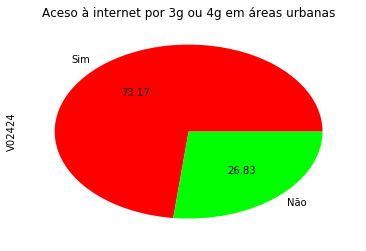

In [5]:
internet_movel1.plot(kind='pie', colors=('red','lime'), autopct="%0.2f", legend=False)
plt.title("Aceso à internet por 3g ou 4g em áreas urbanas")

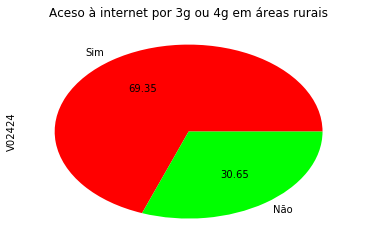

In [6]:
internet_movel2.plot(kind='pie', colors=('red','lime'), autopct="%0.2f", legend=False)
plt.title("Aceso à internet por 3g ou 4g em áreas rurais")

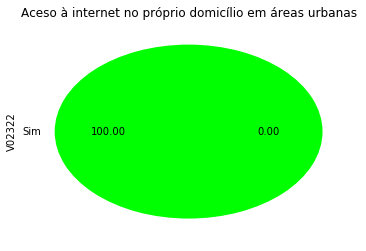

In [7]:
internet_fixa1.plot(kind='pie', colors=('lime','red'), autopct="%0.2f", legend=False)
plt.title("Aceso à internet no próprio domicílio em áreas urbanas")

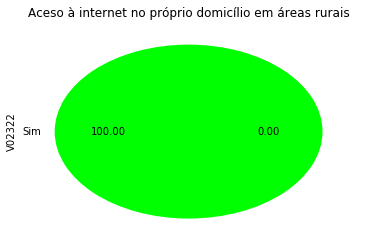

In [8]:
internet_fixa2.plot(kind='pie', colors=('lime','red'), autopct="%0.2f", legend=False)
plt.title("Aceso à internet no próprio domicílio em áreas rurais")

In [16]:
cross = pd.crosstab(internet_fixaUrb, internet_fixaRur, rownames=["internet_fixaUrb"], colnames=["internet_fixaRur"])

In [18]:
cross.plot(kind='pie', colors=('lime','red'), autopct='%.2f', legend=False)

ValueError: pie requires either y column or 'subplots=True'